In [1]:
import pandas as pd

In [ ]:
sample = None
opf_data = pd.read_csv('/Users/baslad01/data_dump/openfoodfacts/product_data/en.openfoodfacts.org.products.csv', sep='\t', encoding='utf-8', on_bad_lines='skip', nrows=sample)
opf_data.head()

In [3]:
opf_data_country = opf_data[['code','countries_en']]

In [4]:
# Get the count of the countries_en
opf_data_country['countries_en'] = opf_data_country['countries_en'].astype(str).str.lower()
opf_data_country['countries_en'] = opf_data_country['countries_en'].str.split(',')
opf_data_country = opf_data_country.explode('countries_en')
opf_data_country

/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64574/998246233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_data_country['countries_en'] = opf_data_country['countries_en'].astype(str).str.lower()
/var/folders/_n/nybmwjg90rxfzcynss3bqkr80000gp/T/ipykernel_64574/998246233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opf_data_country['countries_en'] = opf_data_country['countries_en'].str.split(',')


,code,countries_en
0,00000000000000225,france
1,0000000000000207025004,germany
2,00000000000003429145,spain
3,00000000000026772226,france
4,0000000000017,france
...,...,...
99995,31000223243,united states
99996,31000267117,united states
99997,31000303969,united states
99998,31000304744,united states


In [5]:
# Strip any leading/trailing whitespace from the country names
opf_data_country['countries_en'] = opf_data_country['countries_en'].str.strip()


country_count = opf_data_country['countries_en'].value_counts()
# Convert the Series to a DataFrame
country_count = country_count.reset_index()

# Rename the columns for clarity
country_count.columns = ['country', 'count']

country_count


,country,count
0,united states,80387
1,france,6923
2,world,5455
3,united kingdom,2885
4,spain,2460
...,...,...
183,nepal,1
184,nederland,1
185,paraguay,1
186,sint maarten,1


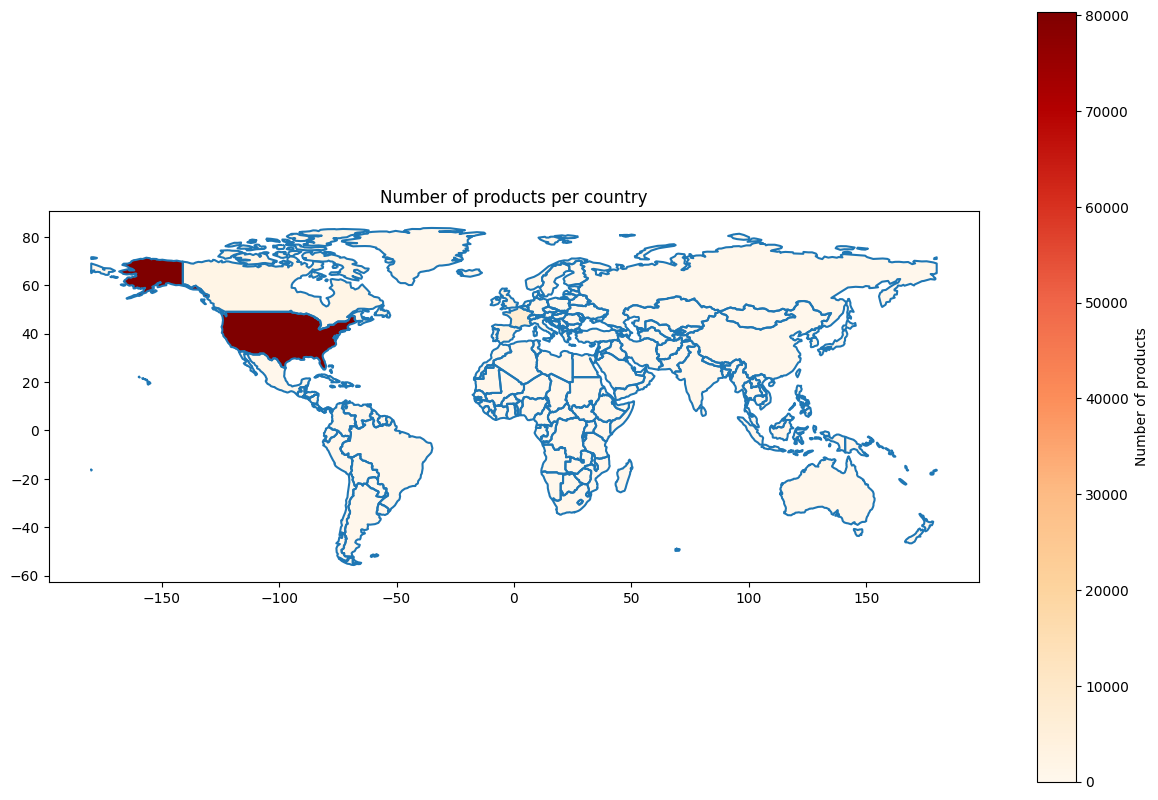

In [6]:
# Represent the country count in a map
import geopandas as gpd
import matplotlib.pyplot as plt

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

world['SUBUNIT'] = world['SUBUNIT'].str.lower()

world = world[(world.POP_EST > 0) & (world.SUBUNIT != "antarctica")]


# Merge the world map with the country count
world = world.merge(country_count, left_on='SUBUNIT', right_on='country', how='left')
world['count'] = world['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True, legend_kwds={'label': "Number of products"}, cmap='OrRd', missing_kwds={"color": "lightgrey"})
plt.title('Number of products per country')
plt.show()

In [7]:
country_count

,country,count
0,united states,80387
1,france,6923
2,world,5455
3,united kingdom,2885
4,spain,2460
...,...,...
183,nepal,1
184,nederland,1
185,paraguay,1
186,sint maarten,1


In [8]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,country,count
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,0.0
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,0.0
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,0.0
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",canada,1711.0
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",united states,80387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,0.0
172,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",NaN,0.0
173,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,0.0
174,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",trinidad and tobago,27.0
